In [174]:
#pip install yfinance

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 12, 31)
df = web.DataReader(['TSLA','F'], 'yahoo', start, end)
df.tail()
df["Date"] = df.index
df = df[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.head())

Attributes       Date        Open              High               Low        \
Symbols                      TSLA     F        TSLA     F        TSLA     F   
0          2020-12-31  699.989990  8.84  718.719971  8.86  691.119995  8.78   
1          2021-01-04  719.460022  8.81  744.489990  8.84  717.190002  8.43   
2          2021-01-05  723.659973  8.47  740.840027  8.72  719.200012  8.46   
3          2021-01-06  758.489990  8.79  774.000000  8.94  749.099976  8.68   
4          2021-01-07  777.630005  8.94  816.989990  9.08  775.200012  8.88   

Attributes       Close         Adj Close                Volume              
Symbols           TSLA     F        TSLA         F        TSLA           F  
0           705.669983  8.79  705.669983  8.701225  49649900.0  40176500.0  
1           729.770020  8.52  729.770020  8.433952  48638200.0  85043100.0  
2           735.109985  8.65  735.109985  8.562639  32245200.0  70127800.0  
3           755.979980  8.84  755.979980  8.750721  44700000.

In [20]:
#df = pd.DataFrame(df)
# append data frame to CSV file
#header_list=["Open","High","Low","Close","Volume","Dividends","StockSplits"]
df.to_csv('stock.csv', mode='a', index=False)

In [6]:
'''#import
import csv
import firebase_admin
import google.cloud
from firebase_admin import credentials, firestore
from firebase_admin import auth

#if not firebase_admin.initialize_app:
cred = credentials.Certificate("C:/Users/dhars/DSAC-FA-MVP-Configuration.json")
app = firebase_admin.initialize_app(cred)

store = firestore.client()

file_path = "stockstorage1.csv"
collection_name = "financialstock"


def batch_data(iterable, n=0):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]


data = []
headers = []
with open(file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            for header in row:
                headers.append(header)
            line_count += 1
        else:
            obj = {}
            for idx, item in enumerate(row):
                obj[headers[idx]] = item
            data.append(obj)
            line_count += 1
    print(f'Processed {line_count} lines.')

for batched_data in batch_data(data, 400):
    batch = store.batch()
    for data_item in batched_data:
        doc_ref = store.collection(collection_name).document()
        batch.set(doc_ref, data_item)
    batch.commit()

print('Done')'''

Processed 320 lines.
Done


In [8]:
'''#export
import firebase_admin
from firebase_admin import credentials, firestore

if not firebase_admin.initialize_app:
    cred = credentials.Certificate("C:/Users/dhars/DSAC-FA-MVP-Configuration.json")
    app = firebase_admin.initialize_app(cred)

store = firestore.client()
doc_ref = store.collection(u'financialstock')

data = []

docs = doc_ref.get()
for doc in docs:
    df1 = data.append(doc.to_dict())
print(len(data))
print(data)'''

493
[{'Low': '8.779999732971191', 'Open': '8.84000015258789', 'Volume': '40176500.0', 'Adj Close': '8.701225280761719', 'High': '8.859999656677246', 'Close': '8.789999961853027'}, {'Volume': '41173400.0', 'Adj Close': '880.7999877929688', 'Close': '880.7999877929688', 'Low': '838.8200073242188', 'Open': '855.0', 'High': '900.4000244140625'}, {'Low': '12.8100004196167', 'High': '13.130000114440918', 'Close': '12.899999618530273', 'Adj Close': '12.769716262817383', 'Open': '13.109999656677246', 'Volume': '57559800.0'}, {'Low': '12.470000267028809', 'Open': '12.710000038146973', 'High': '12.850000381469727', 'Volume': '64573600.0', 'Adj Close': '12.601433753967285', 'Close': '12.729999542236328'}, {'High': '877.77001953125', 'Adj Close': '863.4199829101562', 'Close': '863.4199829101562', 'Low': '854.75', 'Open': '869.6699829101562', 'Volume': '20161700.0'}, {'Adj Close': '12.047088623046875', 'Open': '12.279999732971191', 'Low': '12.020000457763672', 'Close': '12.170000076293945', 'High':

In [9]:
'''df = pd.DataFrame(data)
df'''

,Low,Open,Volume,Adj Close,High,Close
0,8.779999732971191,8.84000015258789,40176500.0,8.701225280761719,8.859999656677246,8.789999961853027
1,838.8200073242188,855.0,41173400.0,880.7999877929688,900.4000244140625,880.7999877929688
2,12.8100004196167,13.109999656677246,57559800.0,12.769716262817383,13.130000114440918,12.899999618530273
3,12.470000267028809,12.710000038146973,64573600.0,12.601433753967285,12.850000381469727,12.729999542236328
4,854.75,869.6699829101562,20161700.0,863.4199829101562,877.77001953125,863.4199829101562
...,...,...,...,...,...,...
488,858.6599731445312,870.3499755859375,27334000.0,864.1599731445312,891.5,864.1599731445312
489,13.789999961853027,13.920000076293945,38547900.0,13.75961685180664,14.050000190734863,13.899999618530273
490,871.5999755859375,891.3800048828125,23131600.0,883.0900268554688,895.9000244140625,883.0900268554688
491,838.3900146484375,856.0,75055500.0,880.02001953125,884.489990234375,880.02001953125


In [10]:
#df.min()

Low          1.019000e+01
Open         1.004000e+01
Volume       1.002467e+08
Adj Close    1.006729e+01
High         1.005000e+01
Close        1.002000e+01
dtype: float64

In [13]:
#df.max()

Low            TSLA
Open           TSLA
Volume       Volume
Adj Close      TSLA
High           TSLA
Close          TSLA
dtype: object

In [21]:
#df.dtypes

Attributes  Symbols
Adj Close   TSLA       float64
            F          float64
Close       TSLA       float64
            F          float64
High        TSLA       float64
            F          float64
Low         TSLA       float64
            F          float64
Open        TSLA       float64
            F          float64
Volume      TSLA       float64
            F          float64
dtype: object

In [45]:
#df.describe()

Attributes    Adj Close                    Close                     High  \
Symbols            TSLA           F         TSLA           F         TSLA   
count        288.000000  288.000000   288.000000  288.000000   288.000000   
mean         801.810241   14.870523   801.810241   14.993403   819.524616   
std          165.314051    3.647257   165.314051    3.642830   171.186256   
min          563.000000    8.433952   563.000000    8.520000   566.210022   
25%          673.594986   12.146080   673.594986   12.270000   691.035004   
50%          748.214996   13.769516   748.214996   13.910000   758.554993   
75%          907.925018   17.783563   907.925018   17.905000   932.002502   
max         1229.910034   25.061152  1229.910034   25.190001  1243.489990   

Attributes                      Low                     Open              \
Symbols              F         TSLA           F         TSLA           F   
count       288.000000   288.000000  288.000000   288.000000  288.000000   
mean         15.258681   783.563751   14.719896   802.568160   14.994097   
std           3.746604   159.259376    3.535900   165.800534    3.646785   
min           8.720000   539.489990    8.430000   552.549988    8.470000   
25%          12.522500   665.145004   12.137500   678.100021   12.335000   
50%          14.080000   735.460022   13.735000   744.265015   13.945000   
75%          18.122500   886.942490   17.505000   908.684998   17.747499   
max          25.870001  1217.000000   24.370001  1234.410034   24.870001   

Attributes        Volume                
Symbols             TSLA             F  
count       2.880000e+02  2.880000e+02  
mean        2.749313e+07  8.434892e+07  
std         1.175808e+07  4.379554e+07  
min         9.800600e+06  3.212080e+07  
25%         1.921132e+07  5.516005e+07  
50%         2.510195e+07  7.395820e+07  
75%         3.257585e+07  9.995815e+07  
max         8.939650e+07  3.116452e+08

In [23]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg

Symbols,TSLA,F
Date,,
2020-12-31,NaN,NaN
2021-01-04,NaN,NaN
2021-01-05,NaN,NaN
2021-01-06,NaN,NaN
2021-01-07,NaN,NaN
...,...,...
2022-02-15,984.737397,18.913949
2022-02-16,986.227397,18.957641
2022-02-17,987.077297,18.992871


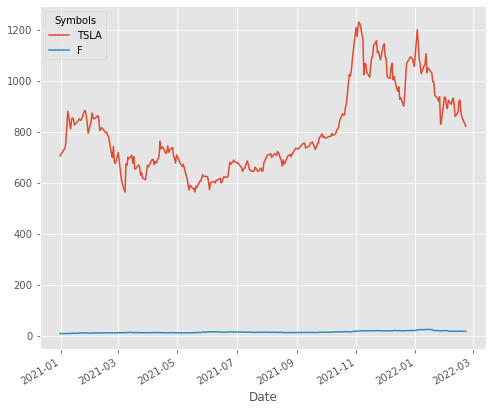

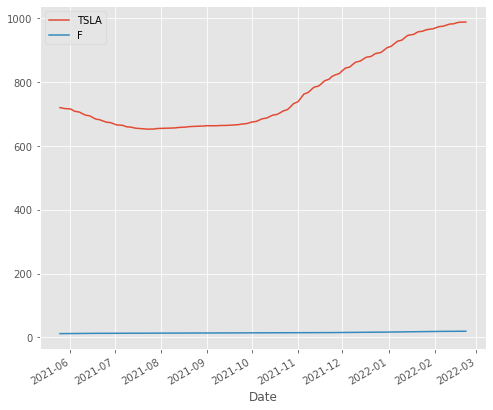

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()

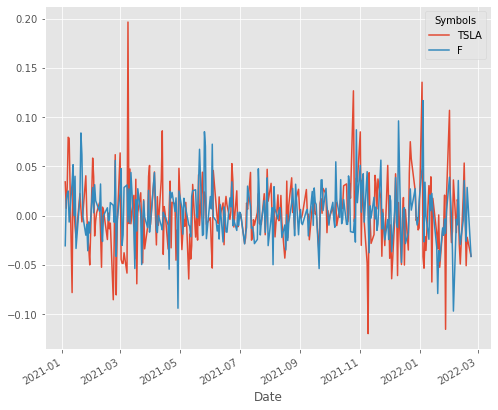

In [26]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [28]:
dfcomp = web.DataReader(['TSLA','F'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,TSLA,F
Date,,
2020-12-31,705.669983,8.701225
2021-01-04,729.770020,8.433952
2021-01-05,735.109985,8.562639
2021-01-06,755.979980,8.750721
2021-01-07,816.039978,8.968499
...,...,...
2022-02-15,922.429993,18.080000
2022-02-16,923.390015,18.010000
2022-02-17,876.349976,17.540001


In [50]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,TSLA,F
Symbols,,
TSLA,1.000000,0.213058
F,0.213058,1.000000


In [51]:
#df=pd.read_csv('stockstorage.csv')
#data.columns=['Open','High','Low','Close','Volume','Dividends','StockSplits']

In [52]:
#pip install pandas_datareader

Text(0, 0.5, 'Returns TSLA')

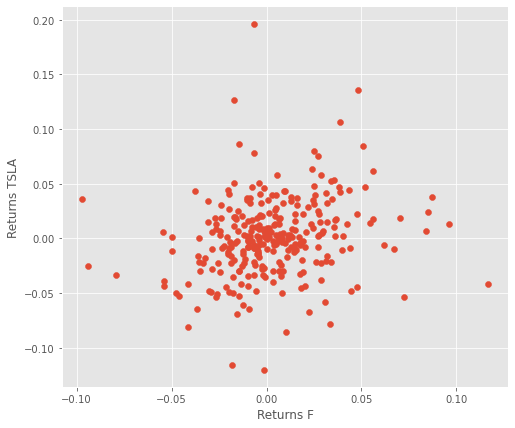

In [53]:
plt.scatter(retscomp.F, retscomp.TSLA)
plt.xlabel('Returns F')
plt.ylabel('Returns TSLA')

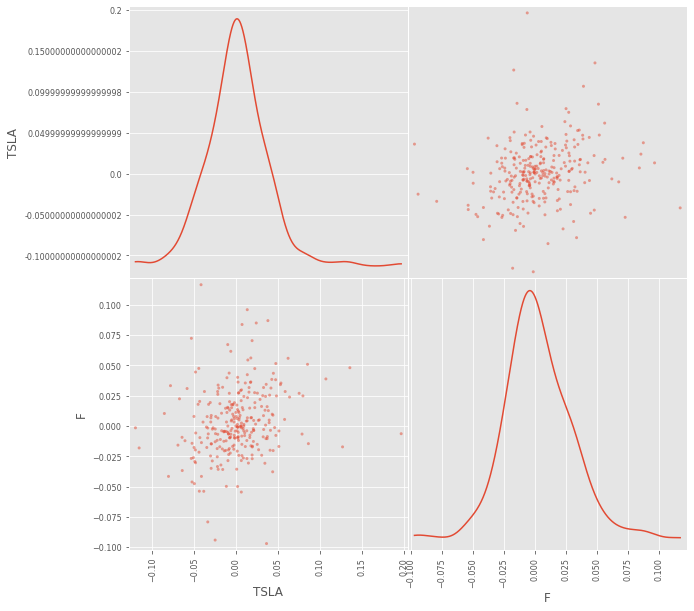

In [54]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

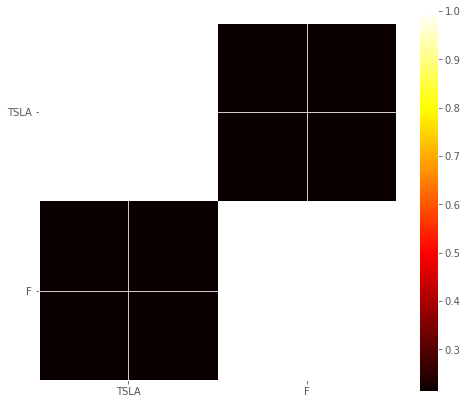

In [55]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

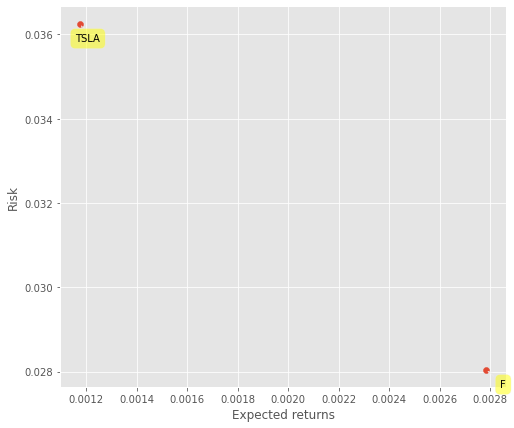

In [56]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [43]:
'''dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = ((df['High'] - df['Low']) / (df['Close'] * 100.0))
dfreg['PCT_change'] = ((df['Close'] - df['Open']) / (df['Open'] * 100.0))'''

"dfreg = df.loc[:,['Adj Close','Volume']]\ndfreg['HL_PCT'] = ((df['High'] - df['Low']) / (df['Close'] * 100.0))\ndfreg['PCT_change'] = ((df['Close'] - df['Open']) / (df['Open'] * 100.0))"

In [44]:
'''import math
import numpy as np
from sklearn import preprocessing
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]'''

"import math\nimport numpy as np\nfrom sklearn import preprocessing\n# Drop missing value\ndfreg.fillna(value=-99999, inplace=True)\n# We want to separate 1 percent of the data to forecast\nforecast_out = int(math.ceil(0.01 * len(dfreg)))\n# Separating the label here, we want to predict the AdjClose\nforecast_col = 'Adj Close'\ndfreg['label'] = dfreg[forecast_col].shift(-forecast_out)\nX = np.array(dfreg.drop(['label'], 1))\n# Scale the X so that everyone can have the same distribution for linear regression\nX = preprocessing.scale(X)\n# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation\nX_lately = X[-forecast_out:]\nX = X[:-forecast_out]\n# Separate label and identify it as y\ny = np.array(dfreg['label'])\ny = y[:-forecast_out]\n\nX_train = X[:80]\ny_train = y[:80]\n\nX_test = X[80:]\ny_test = y[80:]"

In [126]:
'''from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline'''

In [127]:
'''# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)'''

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [128]:
'''# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)'''

KNeighborsRegressor(n_neighbors=2)

In [46]:
'''confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)'''


'confidencereg = clfreg.score(X_test, y_test)\nconfidencepoly2 = clfpoly2.score(X_test,y_test)\nconfidencepoly3 = clfpoly3.score(X_test,y_test)\nconfidenceknn = clfknn.score(X_test, y_test)\nprint(confidencereg)\nprint(confidencepoly2)\nprint(confidencepoly3)\nprint(confidenceknn)'

In [47]:
'''forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
#print(dfreg['Forecast'])'''

"forecast_set = clfreg.predict(X_lately)\ndfreg['Forecast'] = np.nan\n#print(dfreg['Forecast'])"

In [48]:
'''#plotting the prediction
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()'''

"#plotting the prediction\nlast_date = dfreg.iloc[-1].name\nlast_unix = last_date\nnext_unix = last_unix + datetime.timedelta(days=1)\n\nfor i in forecast_set:\n    next_date = next_unix\n    next_unix += datetime.timedelta(days=1)\n    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]\ndfreg['Adj Close'].tail(500).plot()\ndfreg['Forecast'].tail(500).plot()\nplt.legend(loc=4)\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.show()"

In [132]:
#pip install firebase_admin

In [49]:
'''import csv 
import json 
csvFilePath = r'stockdetails1.csv'
jsonFilePath = r'stockdetails1.json'
def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePath = r'stockdetails1.csv'
jsonFilePath = r'stockdetails.json'
csv_to_json(csvFilePath, jsonFilePath)
 '''

"import csv \nimport json \ncsvFilePath = r'stockdetails1.csv'\njsonFilePath = r'stockdetails1.json'\ndef csv_to_json(csvFilePath, jsonFilePath):\n    jsonArray = []\n      \n    #read csv file\n    with open(csvFilePath, encoding='utf-8') as csvf: \n        #load csv file data using csv library's dictionary reader\n        csvReader = csv.DictReader(csvf) \n\n        #convert each csv row into python dict\n        for row in csvReader: \n            #add this python dict to json array\n            jsonArray.append(row)\n  \n    #convert python jsonArray to JSON String and write to file\n    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: \n        jsonString = json.dumps(jsonArray, indent=4)\n        jsonf.write(jsonString)\n          \ncsvFilePath = r'stockdetails1.csv'\njsonFilePath = r'stockdetails.json'\ncsv_to_json(csvFilePath, jsonFilePath)\n "